# LAB 1: métodos basados en vecinos más próximos

In [2]:
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.externals import joblib
import sklearn.metrics as metrics
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 2. Dado el problema de clasificación Blood Transfusion Service Center:

## a. Analiza las características del conjunto de datos: número y tipo de variables de entrada y salida, número de instancias, número de clases y distribución de las mismas, valores perdidos, etc.

Abriendo con un editor de texto el conjunto de datos podemos observar las siguientes características:
* Número de variables de entrada: 4
* Tipo de variables de entrada: Números enteros.
* Número de variables de salida: 1
* Tipo de variables de salida: Número entero que representa si se ha donado en Marzo de 2007 o no.

El resto de características se pueden ver fácilmente tras cargar el dataset en python:

In [3]:
# Cargamos el dataset
bloodTransfusionDataset = np.loadtxt('bloodTransfusion.data', delimiter=',')
# Separamos las variables predictoras de los resultados
xRaw = bloodTransfusionDataset[:,0:bloodTransfusionDataset.shape[1]-1]
y = bloodTransfusionDataset[:,bloodTransfusionDataset.shape[1]-1]

* Número de instancias:

In [4]:
n = len(bloodTransfusionDataset)
n

748

* Número de clases y su distribución:

In [5]:
results = {}
for value in y:
    if(value in results):
        results[value] = results[value] + 1
    else:
        results[value] = 1

results.keys()
for key, value in results.iteritems():
    print 'Class: ', key, ' - ', value*100/n, '%'

Class:  0.0  -  76 %
Class:  1.0  -  23 %


* Valores perdidos:

In [6]:
np.argwhere(np.isnan(xRaw))

array([], shape=(0, 2), dtype=int64)

En este caso no existen valores perdidos. Si los hubiese, sería necesario ejecutar lo siguiente:

In [7]:
# Valores perdidos
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
xPrep = imp.fit_transform(xRaw)

## b. Una de las clases que implementa el algoritmo KNN en scikit-learn es sklearn.neighbors.KNeighborsClassifier. Revisa los parámetros y métodos que tiene.

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

## c. Divide los datos en entrenamiento (80%) y test (20%).

In [8]:
# Estandarizamos los datos
scaler = preprocessing.StandardScaler().fit(xPrep)
x=scaler.transform(xPrep)

# Dividimos el conjunto en entrenamiento y test
xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)
print 'xTrain', xTrain, "\nxTest", xTest, "\nyTrain", yTrain, "\nyTest", yTest

xTrain [[-0.68067941  0.59726713  0.59726713  0.15262115]
 [-0.80428907 -0.08820401 -0.08820401 -0.91468418]
 [-0.92789873 -0.77367514 -0.77367514 -1.32518623]
 ..., 
 [-0.30985042  0.9400027   0.9400027   2.2461816 ]
 [-0.80428907  0.42589934  0.42589934  0.64522361]
 [ 0.80263654 -0.25957179 -0.25957179 -0.05262988]] 
xTest [[-0.68067941 -0.43093957 -0.43093957 -0.2578809 ]
 [-0.92789873  0.9400027   0.9400027   0.27577176]
 [-0.92789873  0.08316378  0.08316378 -0.79153356]
 [-0.68067941  0.76863491  0.76863491 -0.2578809 ]
 [-0.92789873  6.08103621  6.08103621  2.61563344]
 [-0.92789873 -0.60230736 -0.60230736 -1.24308582]
 [ 0.55541721 -0.77367514 -0.77367514 -0.83258377]
 [-0.92789873 -0.60230736 -0.60230736 -1.24308582]
 [ 1.66790417 -0.43093957 -0.43093957  0.23472156]
 [-0.68067941  1.11137048  1.11137048 -0.01157967]
 [ 0.18458823  0.08316378  0.08316378  0.27577176]
 [ 0.55541721 -0.25957179 -0.25957179  0.15262115]
 [-0.92789873 -0.77367514 -0.77367514 -1.32518623]
 [-0.6806

## d. Realiza la experimentación con KNN (KNeighborsClassifier) usando como hiper-parámetro el número de vecinos.

In [10]:
# Create color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

################################################################
#KNN results
################################################################

#Generate grid search
hyperParams = {'n_neighbors': range(1,6), 
               'weights': ['uniform', 'distance']}

#Create an instance of Neighbors Classifier and fit the data for the grid parameters
modelCV = GridSearchCV(neighbors.KNeighborsClassifier(), 
                     hyperParams, cv=5, scoring='accuracy')
modelCV.fit(xTrain, yTrain)
print "Best hyperparameters", modelCV.best_params_
neighList, errList, devList = [], [], []
for hyperP, mean_score, scores in modelCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std(), hyperP))
    if hyperP['weights'] == modelCV.best_params_['weights']:
        neighList.append(hyperP['n_neighbors'])
        errList.append(1-mean_score)
        devList.append(scores.std())
    print()

Best hyperparameters {'n_neighbors': 4, 'weights': 'uniform'}
0.719 (+/-0.026) for {'n_neighbors': 1, 'weights': 'uniform'}
()
0.719 (+/-0.026) for {'n_neighbors': 1, 'weights': 'distance'}
()
0.768 (+/-0.021) for {'n_neighbors': 2, 'weights': 'uniform'}
()
0.729 (+/-0.034) for {'n_neighbors': 2, 'weights': 'distance'}
()
0.751 (+/-0.018) for {'n_neighbors': 3, 'weights': 'uniform'}
()
0.739 (+/-0.020) for {'n_neighbors': 3, 'weights': 'distance'}
()
0.771 (+/-0.031) for {'n_neighbors': 4, 'weights': 'uniform'}
()
0.746 (+/-0.028) for {'n_neighbors': 4, 'weights': 'distance'}
()
0.749 (+/-0.030) for {'n_neighbors': 5, 'weights': 'uniform'}
()
0.727 (+/-0.025) for {'n_neighbors': 5, 'weights': 'distance'}
()


### i. Muestra la gráfica del error de entrenamiento con validación cruzada (5-CV) frente al valor del hiper-parámetro, y justifica la elección del valor más apropiado.

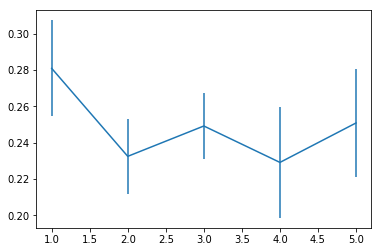

In [15]:
plt.errorbar(neighList, errList, yerr = devList)
plt.show()

### ii. Muestra la gráfica del error de test frente al valor del hiper-parámetro, y valora si la gráfica del error de entrenamiento con validación cruzada ha hecho una buena estimación del error de test.

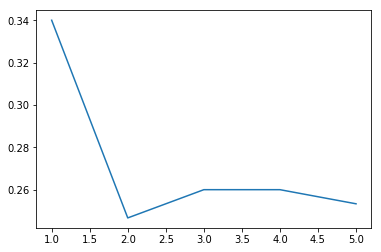

In [12]:
#Test error
testErrList=[]
for nNeighbors in range(1, 6):
    model = neighbors.KNeighborsClassifier(n_neighbors = nNeighbors)
    model.fit(xTrain, yTrain)
    yPred=model.predict(xTest)
    testErrList.append(1-metrics.accuracy_score(yTest,yPred))

plt.errorbar(neighList, testErrList)
plt.show()

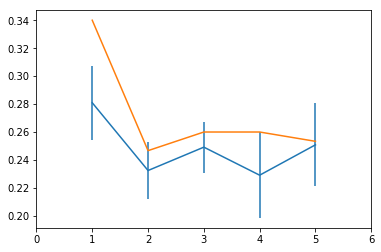

In [13]:
plt.errorbar(neighList, errList, yerr = devList)
plt.xlim(neighList[0]-1, neighList[len(neighList)-1]+1)
plt.errorbar(neighList, testErrList)
plt.show()

# 3. Repite el ejercicio 2 pero para el problema de regresión Energy Efficiency con la variable de salida cooling load. Al ser un problema de regresión deberás utilizar KNeighborsRegressor, y como medida de error de entrenamiento y test el MSE.

## a. Analiza las características del conjunto de datos: número y tipo de variables de entrada y salida, número de instancias, número de clases y distribución de las mismas, valores perdidos, etc.

Abriendo con un editor de texto el conjunto de datos podemos observar las siguientes características:
* Número de variables de entrada: 8
* Tipo de variables de entrada: Números decimales.
* Número de variables de salida: 1
* Tipo de variables de salida: Número decimal que representa cooling load.

El resto de características se pueden ver fácilmente tras cargar el dataset en python:

In [26]:
# Cargamos el dataset
energyEfficiencyDataset = np.loadtxt('EnergyEfficiency.data', delimiter=',', skiprows=1)
# Separamos las variables predictoras de los resultados
xRaw = energyEfficiencyDataset[:,0:energyEfficiencyDataset.shape[1]-1]
yRaw = energyEfficiencyDataset[:,energyEfficiencyDataset.shape[1]-1]

* Número de instancias:

In [21]:
n = len(energyEfficiencyDataset)
n

768

* Número de clases y su distribución:

In [22]:
results = {}
for value in y:
    if(value in results):
        results[value] = results[value] + 1
    else:
        results[value] = 1

results.keys()
for key, value in results.iteritems():
    print 'Class: ', key, ' - ', value*100/n, '%'

Class:  16.75  -  0 %
Class:  14.5  -  0 %
Class:  37.45  -  0 %
Class:  14.75  -  0 %
Class:  15.84  -  0 %
Class:  19.18  -  0 %
Class:  15.0  -  0 %
Class:  16.0  -  0 %
Class:  17.0  -  0 %
Class:  17.15  -  0 %
Class:  30.0  -  0 %
Class:  31.0  -  0 %
Class:  32.0  -  0 %
Class:  34.0  -  0 %
Class:  15.35  -  0 %
Class:  36.93  -  0 %
Class:  21.97  -  0 %
Class:  13.97  -  0 %
Class:  19.76  -  0 %
Class:  17.14  -  0 %
Class:  29.79  -  0 %
Class:  33.16  -  0 %
Class:  15.63  -  0 %
Class:  15.32  -  0 %
Class:  29.43  -  0 %
Class:  30.02  -  0 %
Class:  14.94  -  0 %
Class:  33.24  -  0 %
Class:  15.14  -  0 %
Class:  27.93  -  0 %
Class:  34.52  -  0 %
Class:  13.46  -  0 %
Class:  31.71  -  0 %
Class:  30.19  -  0 %
Class:  26.53  -  0 %
Class:  13.39  -  0 %
Class:  36.1  -  0 %
Class:  29.69  -  0 %
Class:  15.76  -  0 %
Class:  12.08  -  0 %
Class:  25.89  -  0 %
Class:  16.35  -  0 %
Class:  14.4  -  0 %
Class:  12.22  -  0 %
Class:  38.33  -  0 %
Class:  16.11  -  0 

Class:  26.72  -  0 %
Class:  16.99  -  0 %
Class:  26.08  -  0 %
Class:  20.48  -  0 %
Class:  13.59  -  0 %
Class:  15.33  -  0 %
Class:  28.31  -  0 %
Class:  14.23  -  0 %
Class:  17.95  -  0 %
Class:  13.7  -  0 %
Class:  29.59  -  0 %
Class:  45.48  -  0 %
Class:  32.28  -  0 %
Class:  17.23  -  0 %
Class:  36.76  -  0 %
Class:  16.93  -  0 %
Class:  35.56  -  0 %
Class:  16.17  -  0 %
Class:  27.3  -  0 %
Class:  38.84  -  0 %
Class:  15.1  -  0 %
Class:  13.72  -  0 %
Class:  32.43  -  0 %
Class:  14.34  -  0 %
Class:  17.47  -  0 %
Class:  15.95  -  0 %
Class:  27.87  -  0 %
Class:  15.66  -  0 %
Class:  30.11  -  0 %
Class:  38.35  -  0 %
Class:  17.51  -  0 %
Class:  15.48  -  0 %
Class:  14.72  -  0 %
Class:  27.17  -  0 %
Class:  42.86  -  0 %
Class:  25.98  -  0 %
Class:  33.88  -  0 %
Class:  16.87  -  0 %
Class:  25.68  -  0 %
Class:  27.38  -  0 %
Class:  15.21  -  0 %
Class:  13.8  -  0 %
Class:  29.53  -  0 %
Class:  45.13  -  0 %
Class:  31.39  -  0 %
Class:  25.9  

* Valores perdidos:

In [23]:
np.argwhere(np.isnan(xRaw))

array([], shape=(0, 2), dtype=int64)

En este caso no existen valores perdidos. Si los hubiese, sería necesario ejecutar lo siguiente:

In [34]:
# Valores perdidos
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
xPrep = imp.fit_transform(xRaw)
xPrep

[array([[  9.80000000e-01,   5.14500000e+02,   2.94000000e+02, ...,
           2.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  9.80000000e-01,   5.14500000e+02,   2.94000000e+02, ...,
           3.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  9.80000000e-01,   5.14500000e+02,   2.94000000e+02, ...,
           4.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  6.20000000e-01,   8.08500000e+02,   3.67500000e+02, ...,
           3.00000000e+00,   4.00000000e-01,   5.00000000e+00],
        [  6.20000000e-01,   8.08500000e+02,   3.67500000e+02, ...,
           4.00000000e+00,   4.00000000e-01,   5.00000000e+00],
        [  6.20000000e-01,   8.08500000e+02,   3.67500000e+02, ...,
           5.00000000e+00,   4.00000000e-01,   5.00000000e+00]])]

## b. Una de las clases que implementa el algoritmo KNN en scikit-learn es sklearn.neighbors.KNeighborsRegressor. Revisa los parámetros y métodos que tiene.

 class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

## c. Divide los datos en entrenamiento (80%) y test (20%).

In [37]:
# Estandarizamos los datos
scaler = preprocessing.StandardScaler().fit(xPrep)
x=scaler.transform(xPrep)
# En regresion debemos estandarizar tambien los datos de salida
# scaler = preprocessing.StandardScaler().fit(yRaw)
# y=scaler.transform(yRaw)
y = yRaw

# Dividimos el conjunto en entrenamiento y test
xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)
print 'xTrain', xTrain, "\nxTest", xTest, "\nyTrain", yTrain, "\nyTest", yTest

xTrain [[-0.22861593  0.16235226 -1.68585446 ...,  1.34164079  1.2440492
  -0.5242106 ]
 [-0.03941654 -0.1159659   2.24780595 ...,  0.4472136  -1.00932293
  -0.5242106 ]
 [ 1.28497917 -1.22923856  0.         ...,  1.34164079 -1.00932293
   1.41133622]
 ..., 
 [ 1.28497917 -1.22923856  0.         ..., -0.4472136   1.2440492
   0.12097168]
 [-0.51241501  0.44067043 -1.12390297 ...,  1.34164079  1.2440492
  -1.16939287]
 [ 0.52818162 -0.67260223  0.         ..., -1.34164079  1.2440492
   0.76615395]] 
xTest [[-0.98541347  0.99730676  0.         ..., -0.4472136   1.2440492
   0.12097168]
 [-0.22861593  0.16235226 -1.68585446 ...,  0.4472136  -1.00932293
  -0.5242106 ]
 [ 0.24438254 -0.39428407  0.56195149 ..., -0.4472136  -1.00932293
  -0.5242106 ]
 ..., 
 [-0.98541347  0.99730676  0.         ...,  0.4472136  -1.00932293
   0.76615395]
 [-1.36381225  1.55394308  1.12390297 ...,  1.34164079  0.11736313
   1.41133622]
 [-1.36381225  1.55394308  1.12390297 ..., -1.34164079  0.11736313
  -0.52

## d. Realiza la experimentación con KNN (KNeighborsRegressor) usando como hiper-parámetro el número de vecinos.

In [40]:
# Create color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

################################################################
#KNN results
################################################################

#Generate grid search
hyperParams = {'n_neighbors': range(1,6), 
               'weights': ['uniform', 'distance']}

#Create an instance of Neighbors Classifier and fit the data for the grid parameters
modelCV = GridSearchCV(neighbors.KNeighborsRegressor(), 
                     hyperParams, cv=5, scoring='neg_mean_squared_error')
modelCV.fit(xTrain, yTrain)
print "Best hyperparameters", modelCV.best_params_
neighList, errList, devList = [], [], []
for hyperP, mean_score, scores in modelCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std(), hyperP))
    if hyperP['weights'] == modelCV.best_params_['weights']:
        neighList.append(hyperP['n_neighbors'])
        errList.append(1-mean_score)
        devList.append(scores.std())
    print()

Best hyperparameters {'n_neighbors': 3, 'weights': 'uniform'}
-8.822 (+/-2.770) for {'n_neighbors': 1, 'weights': 'uniform'}
()
-8.822 (+/-2.770) for {'n_neighbors': 1, 'weights': 'distance'}
()
-7.392 (+/-1.560) for {'n_neighbors': 2, 'weights': 'uniform'}
()
-7.385 (+/-1.576) for {'n_neighbors': 2, 'weights': 'distance'}
()
-6.910 (+/-1.438) for {'n_neighbors': 3, 'weights': 'uniform'}
()
-6.925 (+/-1.506) for {'n_neighbors': 3, 'weights': 'distance'}
()
-7.293 (+/-1.541) for {'n_neighbors': 4, 'weights': 'uniform'}
()
-7.170 (+/-1.581) for {'n_neighbors': 4, 'weights': 'distance'}
()
-7.545 (+/-1.654) for {'n_neighbors': 5, 'weights': 'uniform'}
()
-7.324 (+/-1.589) for {'n_neighbors': 5, 'weights': 'distance'}
()


### i. Muestra la gráfica del error de entrenamiento con validación cruzada (5-CV) frente al valor del hiper-parámetro, y justifica la elección del valor más apropiado.

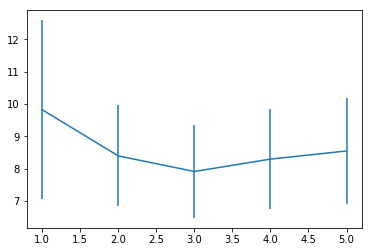

In [41]:
plt.errorbar(neighList, errList, yerr = devList)
plt.show()

### ii. Muestra la gráfica del error de test frente al valor del hiper-parámetro, y valora si la gráfica del error de entrenamiento con validación cruzada ha hecho una buena estimación del error de test.

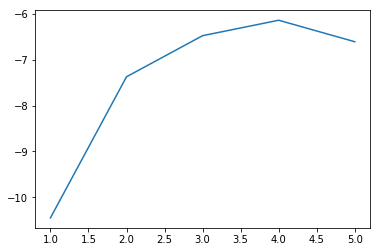

In [42]:
#Test error
testErrList=[]
for nNeighbors in range(1, 6):
    model = neighbors.KNeighborsRegressor(n_neighbors = nNeighbors)
    model.fit(xTrain, yTrain)
    yPred=model.predict(xTest)
    testErrList.append(1-metrics.mean_squared_error(yTest,yPred))

plt.errorbar(neighList, testErrList)
plt.show()

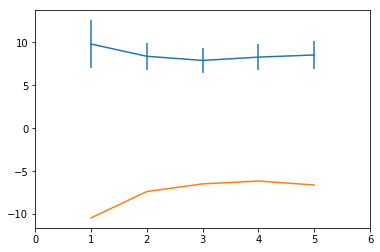

In [43]:
plt.errorbar(neighList, errList, yerr = devList)
plt.xlim(neighList[0]-1, neighList[len(neighList)-1]+1)
plt.errorbar(neighList, testErrList)
plt.show()